In [2]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb, pleth_spi

# creating histogram
print("created a new group histogram\n")
group_hist_ppga = pleth_spi.Histogram(0, 20, 1000)
group_hist_hbi = pleth_spi.Histogram(240, 2000, 1000)

non_list = []
vital_path = 'PACU_vital/PACU1_10-12'
vital_list = os.listdir(vital_path)

srate, cnt = 100, 0
# 추가 샘플을 group histo 에 집어넣음
for f_vital in vital_list:
    cnt += 1
    cachepath = "cache/PPG/hbi_ppga_" + f_vital
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
        print('already existing...loading sample... '+f_vital, end='')
        print('loading sample '+f_vital)
        #hbi_list, ppga_list = pickle.load(open(cachepath, 'rb'))
        
        #for hbi in hbi_list:
        #    group_hist_hbi.learn(hbi)
        #for ppga in ppga_list:
        #    group_hist_ppga.learn(ppga)
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        if not '.vital' in f_vital:
            print('not a vital file')
            non_list.append(f_vital)
            continue
        
        vals = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADCW/PLETH'], interval = 0.01).flatten()
        print('size of', f_vital, ':', len(vals), end='')
        
        # vals 값이 none 밖에 없는 경우
        if len(vals)==1:
            print('no data')
            non_list.append(f_vital)
            continue
            
        print('\ndetecting peak...', end='')
        vals = arr.exclude_undefined(vals)
        
        # vals 값이 일정한 경우
        if len(np.unique(vals)) == 1:
            print('no valid data')
            non_list.append(f_vital)
            continue
        
        try:
            minlist, maxlist = arr.detect_peaks(vals, 100)
            print('completed...')

            hbi_list, ppga_list = [], []
            for j in range(len(maxlist) - 1):
                hbi = (maxlist[j+1] - maxlist[j]) / srate * 1000
                if 240 < hbi < 2000:
                    #group_hist_hbi.learn(hbi)
                    hbi_list.append(hbi)
                ppga = vals[maxlist[j+1]] - vals[minlist[j]]
                if 0 < ppga < 100:
                    #group_hist_ppga.learn(ppga)
                    ppga_list.append(ppga)    

            pickle.dump((hbi_list, ppga_list), open(cachepath, 'wb'))
        except:
            print('error')
            non_list.append(f_vital)

created a new group histogram

(1/678)  already existing...loading sample... PACU1_12_200115_153355.vitalloading sample PACU1_12_200115_153355.vital
(2/678)  already existing...loading sample... PACU1_10_190827_113303.vitalloading sample PACU1_10_190827_113303.vital
(3/678)  already existing...loading sample... PACU1_10_190429_163301.vitalloading sample PACU1_10_190429_163301.vital
(4/678)  already existing...loading sample... PACU1_11_200117_155606.vitalloading sample PACU1_11_200117_155606.vital
(5/678)  already existing...loading sample... PACU1_11_200114_103104.vitalloading sample PACU1_11_200114_103104.vital
(6/678)  already existing...loading sample... PACU1_11_190708_161809.vitalloading sample PACU1_11_190708_161809.vital
(7/678)  already existing...loading sample... PACU1_11_200715_165207.vitalloading sample PACU1_11_200715_165207.vital
(8/678)  already existing...loading sample... PACU1_11_190429_120455.vitalloading sample PACU1_11_190429_120455.vital
(9/678)  already existing

detecting peak...completed...
(75/678)  already existing...loading sample... PACU1_11_200107_130040.vitalloading sample PACU1_11_200107_130040.vital
(76/678)  already existing...loading sample... PACU1_10_200508_143252.vitalloading sample PACU1_10_200508_143252.vital
(77/678)  already existing...loading sample... PACU1_10_200120_161227.vitalloading sample PACU1_10_200120_161227.vital
(78/678)  already existing...loading sample... PACU1_11_200319_164313.vitalloading sample PACU1_11_200319_164313.vital
(79/678)  already existing...loading sample... PACU1_11_190607_155343.vitalloading sample PACU1_11_190607_155343.vital
(80/678)  already existing...loading sample... PACU1_11_200527_145624.vitalloading sample PACU1_11_200527_145624.vital
(81/678)  already existing...loading sample... PACU1_10_190516_171941.vitalloading sample PACU1_10_190516_171941.vital
(82/678)  already existing...loading sample... PACU1_11_200316_155524.vitalloading sample PACU1_11_200316_155524.vital
(83/678)  already 

detecting peak...completed...
(149/678)  already existing...loading sample... PACU1_11_190726_154710.vitalloading sample PACU1_11_190726_154710.vital
(150/678)  already existing...loading sample... PACU1_10_201028_093439.vitalloading sample PACU1_10_201028_093439.vital
(151/678) size of PACU1_10_200225_140955.vital : 263035
detecting peak...completed...
(152/678) size of PACU1_10_200207_131048.vital : 249140
detecting peak...completed...
(153/678) size of PACU1_10_200214_152045.vital : 250592
detecting peak...completed...
(154/678)  already existing...loading sample... PACU1_10_200513_125434.vitalloading sample PACU1_10_200513_125434.vital
(155/678)  already existing...loading sample... PACU1_12_190905_121448.vitalloading sample PACU1_12_190905_121448.vital
(156/678) size of PACU1_10_200214_112353.vital : 233168
detecting peak...completed...
(157/678)  already existing...loading sample... PACU1_11_200303_131125.vitalloading sample PACU1_11_200303_131125.vital
(158/678)  already existin

detecting peak...completed...
(230/678)  already existing...loading sample... PACU1_12_190515_154226.vitalloading sample PACU1_12_190515_154226.vital
(231/678)  already existing...loading sample... PACU1_11_190529_132650.vitalloading sample PACU1_11_190529_132650.vital
(232/678)  already existing...loading sample... PACU1_10_200114_134033.vitalloading sample PACU1_10_200114_134033.vital
(233/678) size of PACU1_12_200221_140131.vital : 213096
detecting peak...completed...
(234/678)  already existing...loading sample... PACU1_10_190820_115608.vitalloading sample PACU1_10_190820_115608.vital
(235/678)  already existing...loading sample... PACU1_11_200706_125541.vitalloading sample PACU1_11_200706_125541.vital
(236/678)  already existing...loading sample... PACU1_10_201028_152639.vitalloading sample PACU1_10_201028_152639.vital
(237/678)  already existing...loading sample... PACU1_10_190903_153947.vitalloading sample PACU1_10_190903_153947.vital
(238/678)  already existing...loading sample

detecting peak...completed...
(305/678)  already existing...loading sample... PACU1_12_190704_164600.vitalloading sample PACU1_12_190704_164600.vital
(306/678)  already existing...loading sample... PACU1_11_190515_132816.vitalloading sample PACU1_11_190515_132816.vital
(307/678)  already existing...loading sample... PACU1_10_190829_170015.vitalloading sample PACU1_10_190829_170015.vital
(308/678)  already existing...loading sample... PACU1_10_200806_150024.vitalloading sample PACU1_10_200806_150024.vital
(309/678)  already existing...loading sample... PACU1_10_200911_172005.vitalloading sample PACU1_10_200911_172005.vital
(310/678) size of PACU1_12_200205_143346.vital : 261511
detecting peak...completed...
(311/678)  already existing...loading sample... PACU1_10_200923_104916.vitalloading sample PACU1_10_200923_104916.vital
(312/678)  already existing...loading sample... PACU1_11_201005_142838.vitalloading sample PACU1_11_201005_142838.vital
(313/678)  already existing...loading sample

detecting peak...completed...
(389/678)  already existing...loading sample... PACU1_12_201026_164359.vitalloading sample PACU1_12_201026_164359.vital
(390/678)  already existing...loading sample... PACU1_11_200911_153855.vitalloading sample PACU1_11_200911_153855.vital
(391/678)  already existing...loading sample... PACU1_12_190517_120647.vitalloading sample PACU1_12_190517_120647.vital
(392/678)  already existing...loading sample... PACU1_12_190822_163908.vitalloading sample PACU1_12_190822_163908.vital
(393/678)  already existing...loading sample... PACU1_11_190823_164251.vitalloading sample PACU1_11_190823_164251.vital
(394/678)  already existing...loading sample... PACU1_12_190530_161916.vitalloading sample PACU1_12_190530_161916.vital
(395/678)  already existing...loading sample... PACU1_10_200714_173350.vitalloading sample PACU1_10_200714_173350.vital
(396/678)  already existing...loading sample... PACU1_12_190516_145430.vitalloading sample PACU1_12_190516_145430.vital
(397/678) 

detecting peak...completed...
(465/678)  already existing...loading sample... PACU1_10_200819_111407.vitalloading sample PACU1_10_200819_111407.vital
(466/678)  already existing...loading sample... PACU1_10_190612_144246.vitalloading sample PACU1_10_190612_144246.vital
(467/678)  already existing...loading sample... PACU1_11_190514_165036.vitalloading sample PACU1_11_190514_165036.vital
(468/678)  already existing...loading sample... PACU1_11_200706_164535.vitalloading sample PACU1_11_200706_164535.vital
(469/678)  already existing...loading sample... PACU1_11_191017_140015.vitalloading sample PACU1_11_191017_140015.vital
(470/678)  already existing...loading sample... PACU1_12_200626_100506.vitalloading sample PACU1_12_200626_100506.vital
(471/678) size of PACU1_10_200122_092803.vital : 276123
detecting peak...completed...
(472/678)  already existing...loading sample... PACU1_10_200507_144108.vitalloading sample PACU1_10_200507_144108.vital
(473/678)  already existing...loading sample

detecting peak...completed...
(537/678)  already existing...loading sample... PACU1_12_200109_150545.vitalloading sample PACU1_12_200109_150545.vital
(538/678)  already existing...loading sample... PACU1_10_200115_102044.vitalloading sample PACU1_10_200115_102044.vital
(539/678)  already existing...loading sample... PACU1_11_200326_134755.vitalloading sample PACU1_11_200326_134755.vital
(540/678)  already existing...loading sample... PACU1_12_190820_153404.vitalloading sample PACU1_12_190820_153404.vital
(541/678)  already existing...loading sample... PACU1_10_190909_125533.vitalloading sample PACU1_10_190909_125533.vital
(542/678) size of PACU1_10_200224_165305.vital : 238213
detecting peak...completed...
(543/678)  already existing...loading sample... PACU1_12_190903_104022.vitalloading sample PACU1_12_190903_104022.vital
(544/678)  already existing...loading sample... PACU1_11_200729_131331.vitalloading sample PACU1_11_200729_131331.vital
(545/678) size of PACU1_10_200220_163047.vit

detecting peak...completed...
(614/678)  already existing...loading sample... PACU1_10_200603_131444.vitalloading sample PACU1_10_200603_131444.vital
(615/678)  already existing...loading sample... PACU1_10_200512_174020.vitalloading sample PACU1_10_200512_174020.vital
(616/678)  already existing...loading sample... PACU1_12_190819_175604.vitalloading sample PACU1_12_190819_175604.vital
(617/678)  already existing...loading sample... PACU1_10_200612_133526.vitalloading sample PACU1_10_200612_133526.vital
(618/678)  already existing...loading sample... PACU1_11_200702_145157.vitalloading sample PACU1_11_200702_145157.vital
(619/678)  already existing...loading sample... PACU1_12_191022_145850.vitalloading sample PACU1_12_191022_145850.vital
(620/678)  already existing...loading sample... PACU1_11_191017_151943.vitalloading sample PACU1_11_191017_151943.vital
(621/678)  already existing...loading sample... PACU1_11_200605_161620.vitalloading sample PACU1_11_200605_161620.vital
(622/678) 

In [9]:
np.unique(vals)

array([-197.265625, -196.875   , -196.484375, -167.96875 ,  199.609375])

In [8]:
len(np.unique(vals))==1

True

In [4]:
vital_list[496]

'PACU1_8_200714_170315.vital'

(array([     0.,      0.,      0.,      0.,      0., 352110.,      0.,
             0.,      0.,      0.]),
 array([199.109375, 199.209375, 199.309375, 199.409375, 199.509375,
        199.609375, 199.709375, 199.809375, 199.909375, 200.009375,
        200.109375]),
 <BarContainer object of 10 artists>)

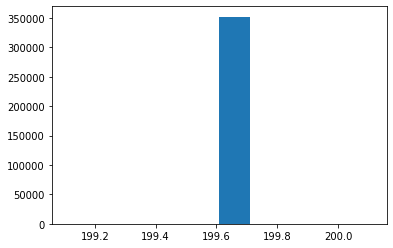

In [3]:
import matplotlib.pyplot as plt
plt.hist(vals)

# pacu 250 ECG에서 peak 뽑기

In [1]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#상위 dir에 있는 파일 읽어오기
#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr



#NRS_vital files들의 목록
vital_path = '../../cranberry2/Preprocessing/ECG_250Hz/ECG_250Hz'
f_vital_list = os.listdir(vital_path)
vital_name = [vital[4:] for vital in f_vital_list]


non_ecg, non_ppg = 0, 0
long_ecg = 0
SRATE = 250
LEN_INPUT = 120
i = 4000
error_list = []

for f_vital in f_vital_list[4000:6000]:
    i = i + 1
    print('＃##Input', i,'/'+str(len(f_vital_list))+'###')
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb'))
    
    
    #detecting peaks of ECG
    e_cache_path = '../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_pacu_2min/'+f_vital[4:]
    
    if os.path.exists(e_cache_path):
        print('already existing ECG peaks')
        
    else:
        print('finding ECG peaks')
        if len(df_vital['ECG']) >= 5*60*SRATE:
            long_ecg += 1
            
        try:
            r_peak_list = arr.detect_qrs((df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten()),SRATE)
        except Exception as er:
            print('에러발생:', er)
            non_ecg += 1
            error_list.append({'file': f_vital, 'type': 'ECG', 'error': er, })
        else:
            pickle.dump(r_peak_list, open(e_cache_path, 'wb'))
            print('successfully saved ECG peaks')

print('No ECG data:', non_ecg)

＃##Input 4001 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4002 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4003 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4004 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4005 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4006 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4007 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4008 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4009 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4010 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4011 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4012 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4013 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4014 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4015 /8318#

successfully saved ECG peaks
＃##Input 4119 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4120 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4121 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4122 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4123 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4124 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4125 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4126 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4127 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4128 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4129 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4130 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4131 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4132 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 4237 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4238 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4239 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4240 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4241 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4242 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4243 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4244 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4245 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4246 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4247 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4248 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4249 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4250 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 4355 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4356 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4357 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4358 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4359 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4360 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4361 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4362 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4363 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4364 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4365 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4366 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4367 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4368 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 4472 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4473 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4474 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4475 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4476 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4477 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4478 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4479 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4480 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4481 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4482 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4483 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4484 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4485 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 4590 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4591 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4592 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4593 /8318###
finding ECG peaks
에러발생: attempt to get argmin of an empty sequence
＃##Input 4594 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4595 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4596 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4597 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4598 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4599 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4600 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4601 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4602 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4603 /8318###
finding ECG peaks


successfully saved ECG peaks
＃##Input 4707 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4708 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4709 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4710 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4711 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4712 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4713 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4714 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4715 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4716 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4717 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4718 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4719 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4720 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 4824 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4825 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4826 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4827 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4828 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4829 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4830 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4831 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4832 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4833 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4834 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4835 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4836 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4837 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 4942 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4943 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4944 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4945 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4946 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4947 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4948 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4949 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4950 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4951 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4952 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4953 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4954 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 4955 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 5060 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5061 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5062 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5063 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5064 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5065 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5066 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5067 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5068 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5069 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5070 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5071 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5072 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5073 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 5178 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5179 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5180 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5181 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5182 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5183 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5184 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5185 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5186 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5187 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5188 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5189 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5190 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5191 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 5296 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5297 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5298 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5299 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5300 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5301 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5302 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5303 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5304 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5305 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5306 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5307 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5308 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5309 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 5414 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5415 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5416 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5417 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5418 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5419 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5420 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5421 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5422 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5423 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5424 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5425 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5426 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5427 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 5532 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5533 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5534 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5535 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5536 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5537 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5538 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5539 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5540 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5541 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5542 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5543 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5544 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5545 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 5650 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5651 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5652 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5653 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5654 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5655 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5656 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5657 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5658 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5659 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5660 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5661 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5662 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5663 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 5768 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5769 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5770 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5771 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5772 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5773 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5774 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5775 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5776 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5777 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5778 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5779 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5780 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5781 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 5886 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5887 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5888 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5889 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5890 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5891 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5892 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5893 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5894 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5895 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5896 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5897 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5898 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 5899 /8318###
finding ECG peaks
successfully saved E